## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
# Importing Pyhton Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading Playstore and User Review Dataset 
path='/content/drive/MyDrive/Alma Better/Data/'
path1='/content/drive/MyDrive/Alma Better/Data/'


In [ ]:
# Creating data frames
play_store_app_df=pd.read_csv(path+'Copy of Play Store Data.csv')
user_review_df=pd.read_csv(path1+'Copy of User Reviews.csv')

This capstone project is based on **Exploratory Data Analysis**. 
So, our first objective is to understand what is Exploratory Data Analysis.

# **1. What is Exploratory Data Analysis?**

**Exploratory Data Analysis (EDA)** refers to the critical process of performing initial investigations on a dataset( import from CSV, Jason, and Html files) to summarize their main characteristics, often with visual methods and check assumptions with the help of summary statistics and graphical representations. EDA is used for analyzing what the data can tell us before the modeling or by applying any set of instructions/code. When you are working with the datasets, it is not easy to determine the important characteristics of the data by looking at the column of numbers or a whole spreadsheet/dataset. It may be tedious, boring, and/or overwhelming to determine experiences by seeing plain numbers. . Exploratory data analysis techniques have been devised as an aid in this situation.

In [ ]:
# Finding null values and seeing Dtypes 
play_store_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **2. Refinement of dataset**

Refining a dataset is the most crucial stage in data analysis. Refinement of a dataset refers to the process of cleaning data and handling the null/ missing data. If your dataset is not properly refined then you may not achieve the optimum results from the dataset. Unrefined data were more prone to creating errors in the results. Sometimes you get an error or gets the wrong results.

**Refine the dataset**

*   Removing Duplicate Apps
*   Removing 19.0 from the column rating
*   Removing 1.9 from the column category

*   Convert the dates in datetime.










In [ ]:
# Making a copy of origianl data set
play_store_df=play_store_app_df.copy()

In [ ]:
# Drop duplicates
play_store_df = play_store_df.drop_duplicates(subset=['App'])


In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
play_store_df.drop(10472, inplace=True)

In [ ]:
# Converting the date into datetime format
play_store_df['Last Updated'] = pd.to_datetime(play_store_df['Last Updated'])

In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   object        
 4   Size            9659 non-null   object        
 5   Installs        9659 non-null   object        
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   object        
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Year            9659 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)


In [ ]:
play_store_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
# Adding a column that contain the updated year
play_store_df['Year'] = play_store_df['Last Updated'].map(lambda x: x.year )

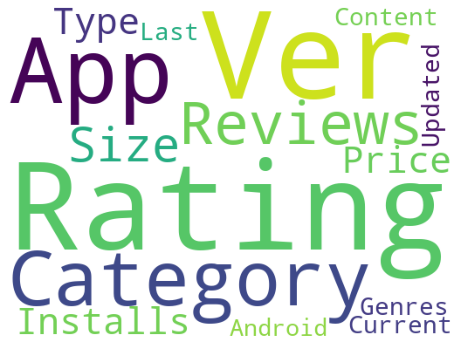

In [ ]:
# Columns name using wordplot
from wordcloud import WordCloud
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(play_store_df))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

**LET'S SEE CATEGORY AND THEIR APP COUNTS**

In [ ]:
# Using groupby function on category column and sorting the values
app_count=play_store_df.groupby(['Category'])['App'].count().sort_values(ascending=False)
#creating data frame
app_count_df=pd.DataFrame(app_count)#creating data frame
app_count_df


,App
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


Text(0, 0.5, 'App Counts')

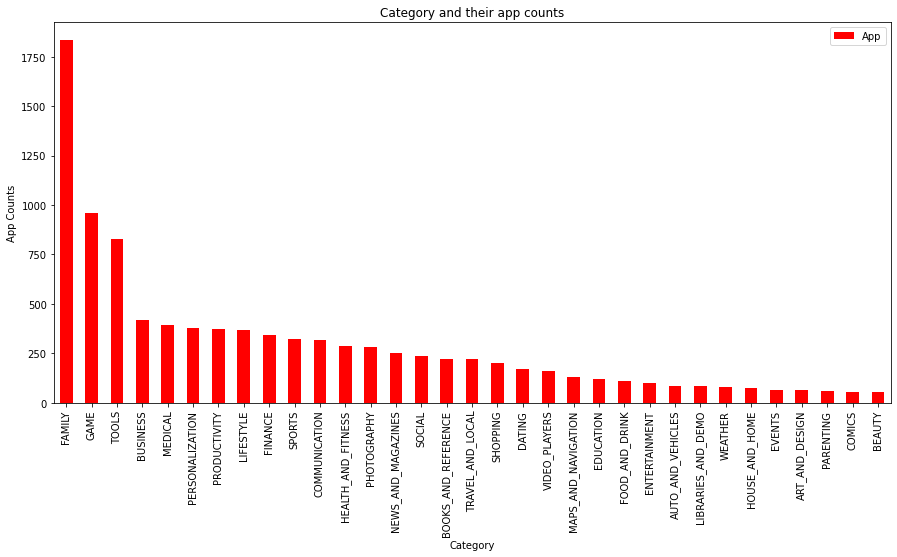

In [ ]:
# Plotting graph 
ax=app_count_df.plot(kind='bar',figsize=(15,7),color='r',title='Category and their app counts')
# Setting labels
ax.set_xlabel('Category')
ax.set_ylabel('App Counts')

**OBSERVATION :**  There is a total of 1832 apps that are from the family category which is the most and after that game category is at second with 959 apps.

**LETS SEE APP COUNTS WITH RATINGS**

In [ ]:
# Using groupby fumction on rating and extracting count
app_count_vs_ratings=play_store_df.groupby('Rating')['App'].count()
app_count_vs_ratings


Rating
1.0     16
1.2      1
1.4      3
1.5      3
1.6      4
1.7      8
1.8      8
1.9     11
2.0     12
2.1      8
2.2     14
2.3     20
2.4     19
2.5     20
2.6     24
2.7     23
2.8     40
2.9     45
3.0     81
3.1     69
3.2     63
3.3    100
3.4    126
3.5    156
3.6    167
3.7    224
3.8    286
3.9    359
4.0    513
4.1    621
4.2    810
4.3    897
4.4    895
4.5    848
4.6    683
4.7    442
4.8    221
4.9     85
5.0    271
Name: App, dtype: int64

Text(0, 0.5, 'App counts')

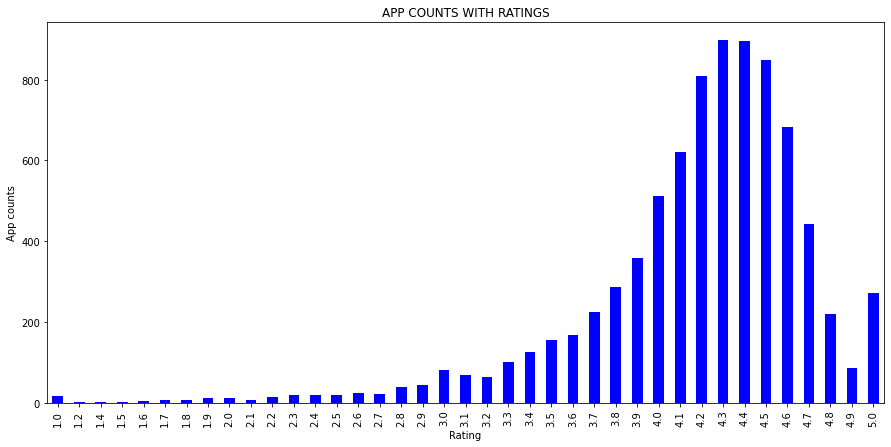

In [ ]:
# Plotting graph 
ax=app_count_vs_ratings.plot(kind='bar', color='b',figsize=(15,7),title='APP COUNTS WITH RATINGS')
# Setting x and y labels
ax.set_xlabel('Rating')
ax.set_ylabel('App counts')

**OBSERVATION :** Here we can see 897 apps are having a 4.4 rating which is the most and after that, in the second place 895 apps are having a 4.3 rating, most apps are having 4.3 ratings. Most of the apps having ratings between 3.5 to 4.8.

**LETS SEE THE UPDATED YEAR AND THEIR APP COUNTS**

In [ ]:
# Here we use groupby on column year and app
last_update_df=play_store_df.groupby(['Year'],as_index=False)['App'].count()
last_update_df

,Year,App
0,2010,1
1,2011,15
2,2012,26
3,2013,108
4,2014,203
5,2015,449
6,2016,779
7,2017,1794
8,2018,6284


Text(0, 0.5, 'App counts')

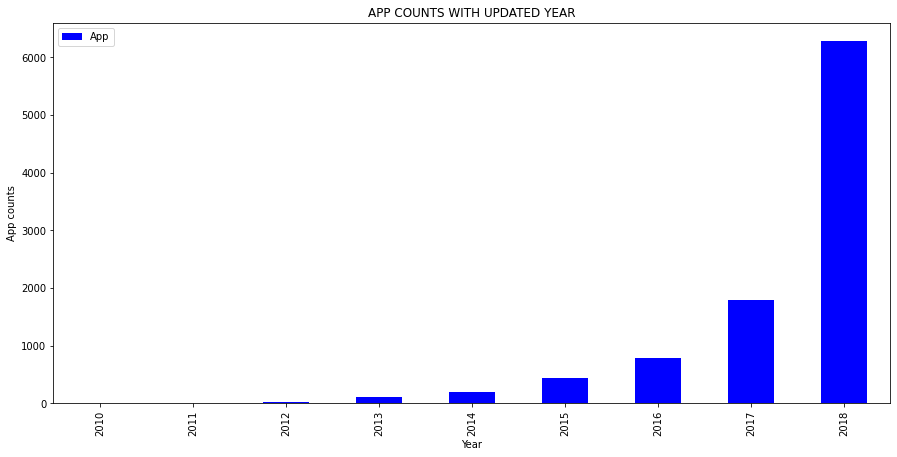

In [ ]:
# Plotting graph 
ax=last_update_df.plot(x='Year',y='App',kind='bar', color='b',figsize=(15,7),title='APP COUNTS WITH UPDATED YEAR')
# Setting x and y labels
ax.set_xlabel('Year')
ax.set_ylabel('App counts')

**Observation:** Out of 9659 apps 6284 receive updates in the year 2018.

**LETS SEE CATEGORY AND THEIR RATING COUNTS!**

In [ ]:
# First we make new df in which we take non null observations of rating coulumns
play_store_df_new=play_store_df.dropna(subset=['Rating'])

In [ ]:
play_store_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
dtypes: float64(1), object(12)
memory usage: 896.4+ KB


In [ ]:
# Extracting category and their rating counts with groupby function
category_vs_rating=play_store_df.groupby(['Category'])['Rating'].count().sort_values(ascending=False)
category_vs_rating

Category
FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
EDUCATION               118
MAPS_AND_NAVIGATION     118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Rating, dtype: int64

Text(0, 0.5, 'Ratings')

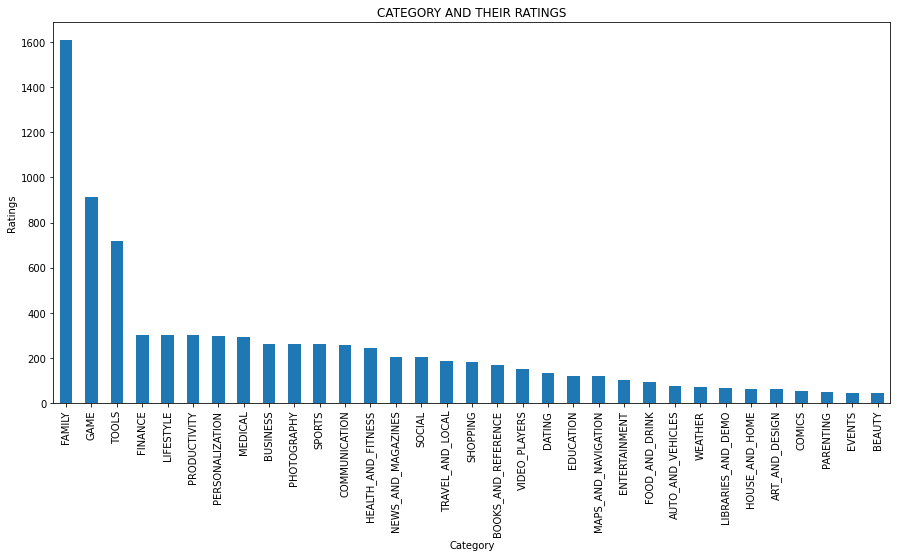

In [ ]:
# Plotting graph 
ax=category_vs_rating.plot(kind='bar',figsize=(15,7),title='CATEGORY AND THEIR RATINGS')
# setting x and y labels
ax.set_xlabel('Category')
ax.set_ylabel('Ratings')

**OBSERVATION :** Here we can see the family category is having the most ratings which are 1608 and second there is the game category with 912 ratings.

**LETS CLEAN SOME DATA**

In [ ]:
# Here we are using lambda function to clean Installs column 
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace('+',""))
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace(',',""))
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace('Free','0'))

In [ ]:
# Converting the datatype object to integer
play_store_df['Installs']=play_store_df['Installs'].astype(int)

In [ ]:
# Seeing datatype
play_store_df['Installs'].dtype

dtype('int64')

**LETS SEE CATEGORY WITH TOTAL NUMBERS OF INSTALLS**

In [ ]:
# Extracting category with number of installs
category_vs_installs=play_store_df.groupby(['Category'])['Installs'].sum()

Text(0, 0.5, 'Number of installs')

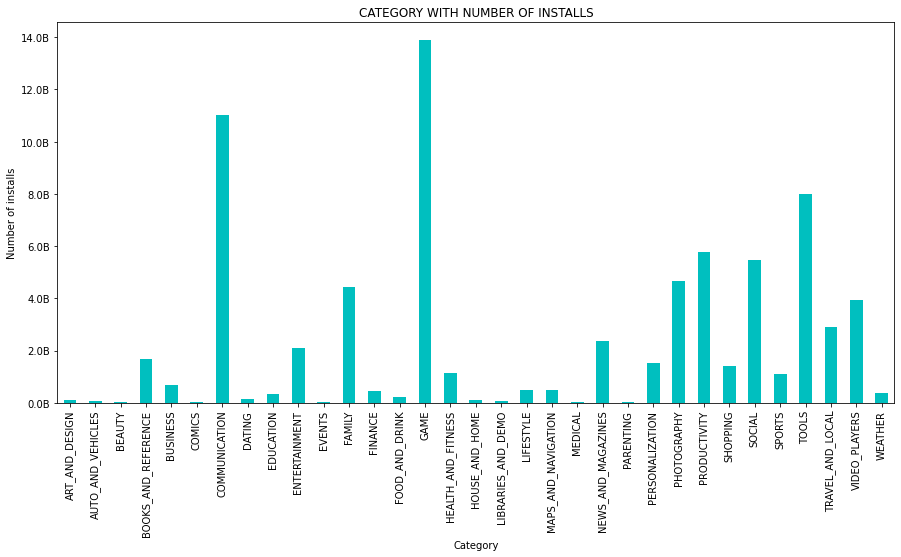

In [ ]:
# Plotting graph
# Function to convert values into Billions
from matplotlib.ticker import FuncFormatter
def Billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x*1e-9)
formatter = FuncFormatter(Billions)
ax=category_vs_installs.plot(kind='bar',color='c',figsize=(15,7),title='CATEGORY WITH NUMBER OF INSTALLS')
#setting x and y labels
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Category')
ax.set_ylabel('Number of installs')


**OBSERVATION :** Here we can see the game category is having the most number of installs and after that communication category is having the second most number of installs.

**LET'S SEE CONTENT RATING AND THEIR COUNTS**

In [ ]:
content_df=play_store_df[play_store_df['Content Rating']!='Unrated']

In [ ]:
content_df['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Name: Content Rating, dtype: int64

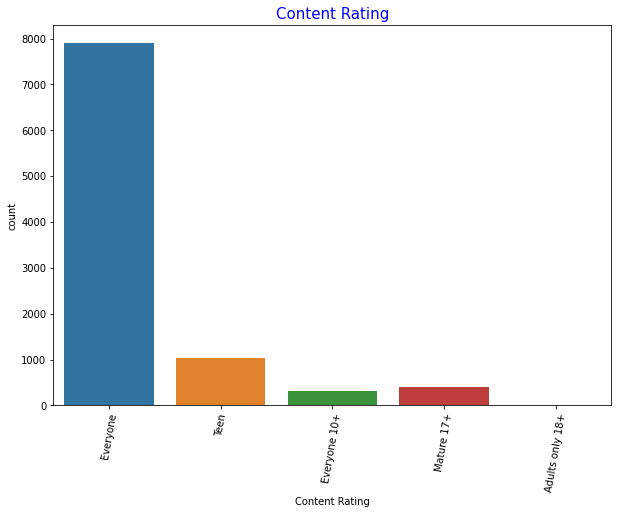

In [ ]:
# Ploting graph
plt.figure(figsize=(10,7))
sns.countplot(data=content_df, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()

**OSERVATION:**  Here we can see that the 7903 app belongs to the content rating everyone and 1036 is for teens. For Mature 17+  there are 393 apps. Only 3 apps fall under the 18+ category.

**LETS SEE APPS AND THEIR TOTAL NUMBERS OF INSTALLS**

In [ ]:
# Extracting app and installs columns
app_installs=play_store_df[['App','Installs']]

app_installs

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000
1,Coloring book moana,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000
3,Sketch - Draw & Paint,50000000
4,Pixel Draw - Number Art Coloring Book,100000
...,...,...
10836,Sya9a Maroc - FR,5000
10837,Fr. Mike Schmitz Audio Teachings,100
10838,Parkinson Exercices FR,1000
10839,The SCP Foundation DB fr nn5n,1000


In [ ]:
# Extracting app and their installs
a=app_installs.sort_values('Installs',ascending=False)[["App",'Installs']]
b=a.reset_index(drop=True)#resetting index
app_and_installs=b.loc[:19,:]#extracting specific rows and columns with loc 
app_and_installs

,App,Installs
0,WhatsApp Messenger,1000000000
1,Google Play Books,1000000000
2,Subway Surfers,1000000000
3,Maps - Navigate & Explore,1000000000
4,Gmail,1000000000
5,Instagram,1000000000
6,Facebook,1000000000
7,Google Chrome: Fast & Secure,1000000000
8,Google+,1000000000
9,YouTube,1000000000


Text(0, 0.5, 'Approx. number of installs')

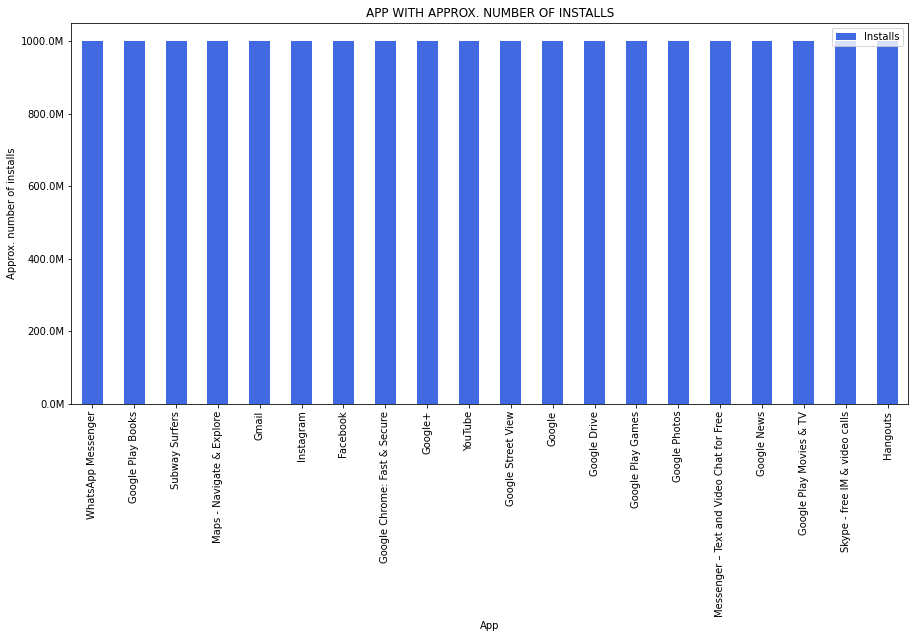

In [ ]:
 # Plotting graph
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)
formatter = FuncFormatter(millions)
ax=app_and_installs.plot(x='App',y='Installs',kind='bar',color='royalblue',figsize=(15,7),title='APP WITH APPROX. NUMBER OF INSTALLS')
#setting x and y labels
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('App')
ax.set_ylabel('Approx. number of installs')

**OBSERVATION :** Here, we can see the apps with 1000000000+ installs.

In [ ]:
# Extracting app and installs columns
installs=play_store_df[['App','Installs']]
sorted=installs.sort_values('Installs')[['App','Installs']]#sorting 
less_installed_app=sorted.loc[sorted['Installs']>0,:].reset_index(drop=True)#resetting index
less_installed_apps=less_installed_app.loc[:19,:]#extracting specific rows and columns with loc
less_installed_apps


,App,Installs
0,Wallpapers FN Herstal FNP 9,1
1,CL 2ne1 Wallpaper KPOP Fans All,1
2,AX Watch for WatchMaker,1
3,db Meter - sound level meter with data logging,1
4,New CL 2ne1 Wallpaper KPOP live,1
5,DK Primrose for KLWP,1
6,D+H Reaction Wall,1
7,BH - Fitness & Nutrition,1
8,Dr D K Olukoya,1
9,Kick Axe Bx,1


In [ ]:
# Dropping the null value from clolumn type
play_store_df=play_store_df.dropna(subset=['Type'])

In [ ]:
# Creating data frame and extracting the counts of app and after that resetting index
df1=pd.DataFrame(play_store_df.groupby('Type')['App'].count()).reset_index()
free_paid=df1.loc[:,['Type','App']]
free_paid

,Type,App
0,Free,8902
1,Paid,756


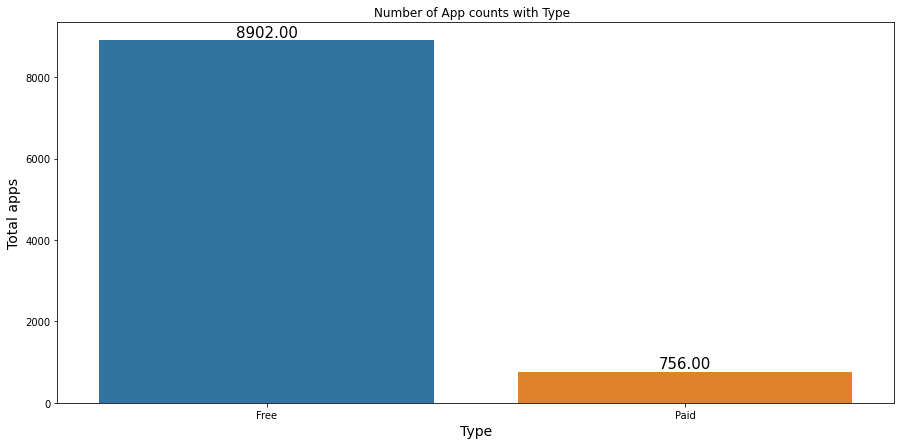

In [ ]:
# Importing seaborn library
# Plotting graph
import seaborn as sns
# Defining the plot size
plt.figure(figsize=(15, 7))


# From which datafarme the values are to be picked
plots = sns.barplot(x=free_paid['Type'], y=free_paid['App'], data=free_paid)


# Iterrating over the bars one-by-one
for bar in plots.patches:
	

	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Type", size=14)

# Setting the label for y-axis
plt.ylabel("Total apps", size=14)

# Setting the title for the graph
plt.title("Number of App counts with Type  ")

# Fianlly showing the plot
plt.show()

**OBSERVATION :** Here we can see there is a total of 8902 apps that are free and 756 apps are paid.

**LETS SEE WHICH TYPE(PAID/FREE) OF APPS ARE MOST INSTALLED**

In [ ]:
# Creating data frame using groupby function on type column and adding all the values after that resetting index
df2=pd.DataFrame(play_store_df.groupby('Type')['Installs'].sum()).reset_index()
df2

,Type,Installs
0,Free,75065572646
1,Paid,57364881


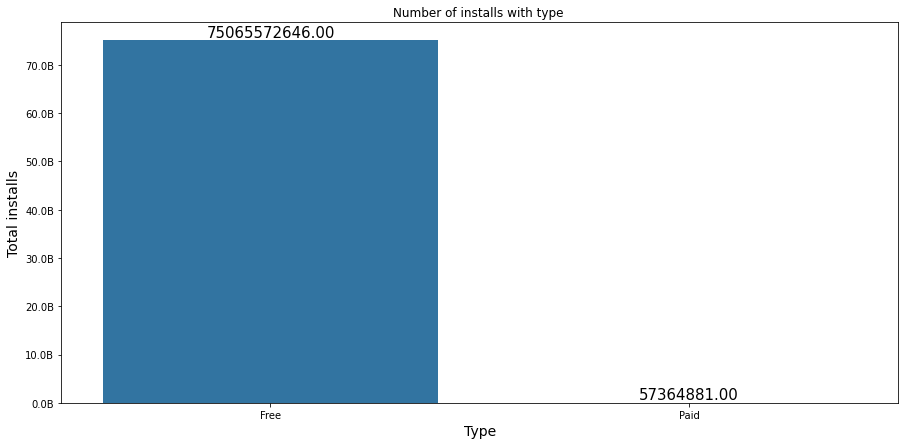

In [ ]:
# Plotting graph
import seaborn as sns
from matplotlib.ticker import FuncFormatter
# Function to convert Y-axis values into Billions
def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x*1e-9)
formatter = FuncFormatter(billions)

# Defining the plot size
plt.figure(figsize=(15, 7))


#from which datafarme the values are to be picked
plots = sns.barplot(x=df2['Type'], y=df2['Installs'], data=df1)

# Iterrating over the bars one-by-one
for bar in plots.patches:
	

	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Type", size=14)

# Setting the label for y-axis
plots.yaxis.set_major_formatter(formatter)
plt.ylabel("Total installs", size=14)

# Setting the title for the graph
plt.title("Number of installs with type ")

# Fianlly showing the plot
plt.show()


**OBSERVATION :** Here we can see a total of 75065572646 free apps are installed and a total of 57364881 paid apps are installed.

**Relation between app size and app type**

In [ ]:
# First we remove those apps whose size vary with the devices
play_store_df_new=play_store_df[play_store_df['Size']!='Varies with device']

In [ ]:
# Now we use the groupby function
Size_df=play_store_df_new.groupby(['Size','Type'],as_index=False)['App'].count().sort_values(['Type','App'],ascending=False).reset_index(drop=True)

In [ ]:
# Now we take the subset of above datframe which contains only apps of type Paid
Paid_size=Size_df.iloc[0:239]

Text(0.5, 1.0, 'Number of App counts with size of type Paid  ')

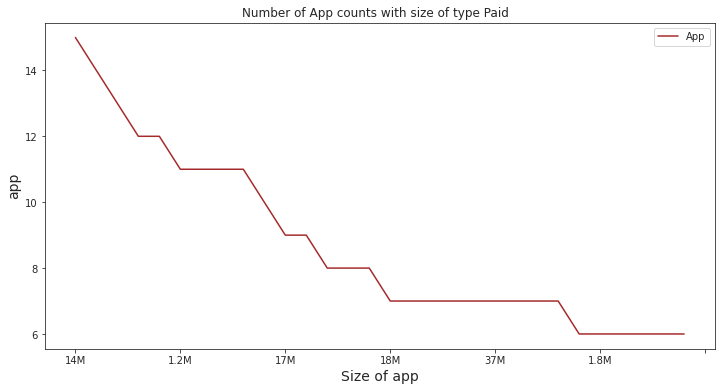

In [ ]:
# Here we plot the graph for 30 obesevations
ax=(Paid_size.iloc[0:30].plot(x='Size',y='App',
    color=['Brown'],
    figsize = (12,6),
    fontsize = 10))
# Setting the label for x-axis
plt.xlabel("Size of app", size=14)

# Setting the label for y-axis
plt.ylabel("app", size=14)

# Setting the title for the graph
plt.title("Number of App counts with size of type Paid  ")

In [ ]:
# Now we take the subset of above datframe which contains only apps of type Free
Free_size=Size_df.iloc[229:260]

Text(0.5, 1.0, 'Number of App counts with size of type Free  ')

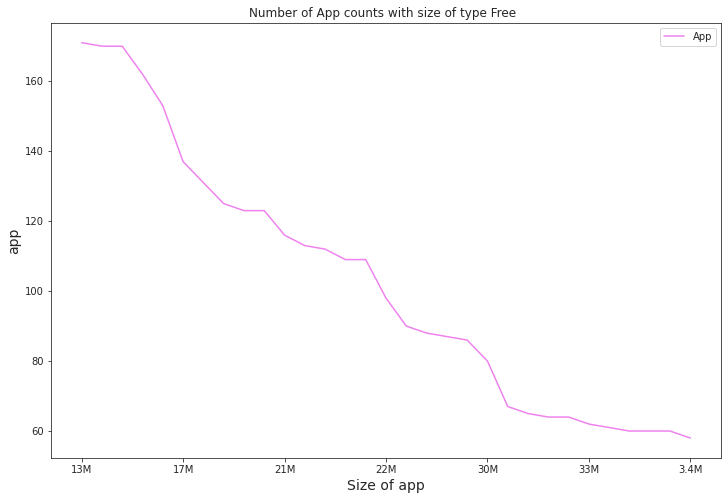

In [ ]:
# Here we plot the graph for above subset
ax=(Free_size.plot(x='Size',y='App',
    color=['violet'],
    figsize = (12,8)))
# Setting the label for x-axis
plt.xlabel("Size of app", size=14)

# Setting the label for y-axis
plt.ylabel("app", size=14)

# Setting the title for the graph
plt.title("Number of App counts with size of type Free  ")

**OBSERVATION:** As we can see that mostly the size of free app lying between 2.3M to 33M. There are 171 app of size 13M. The size of paid apps lying between 1.2M to 33M.

**LETS SEE PAID APPS AND THEIR TOTAL NUMBER OF INSTALLS**

In [ ]:
# Creating data frame and sorting values after hat resetting index extracting specific rows and columns with loc 
df3=(pd.DataFrame(play_store_df.loc[play_store_df['Type']=='Paid',
       ['App','Installs','Type']]).reset_index(drop=True)
       .sort_values('Installs',ascending=False)[['App','Installs','Type']]
       .reset_index(drop=True))
top_10_paid_apps=df3.loc[:9,['App','Installs']]
top_10_paid_apps

,App,Installs
0,Hitman Sniper,10000000
1,Minecraft,10000000
2,Five Nights at Freddy's,1000000
3,Bloons TD 5,1000000
4,HD Widgets,1000000
5,Facetune - For Free,1000000
6,Grand Theft Auto: San Andreas,1000000
7,Infinity Dungeon VIP,1000000
8,Card Wars - Adventure Time,1000000
9,Zombie Avengers:(Dreamsky)Stickman War Z,1000000


Text(0, 0.5, 'Number of installs')

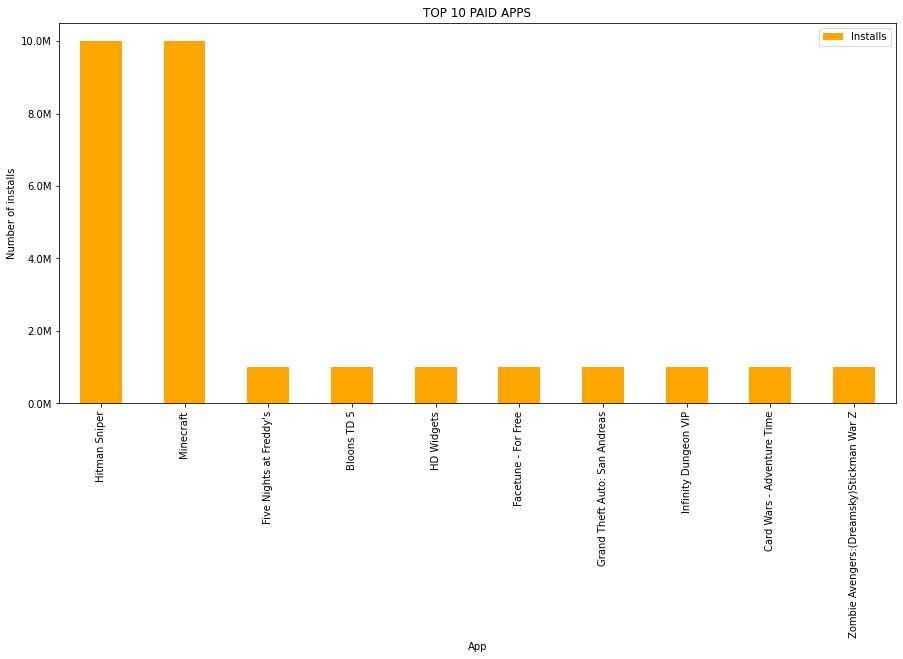

In [ ]:
# Plotting graph
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)
formatter = FuncFormatter(millions)
ax=top_10_paid_apps.plot(x='App',y='Installs',kind='bar',color='orange',figsize=(15,7),title='TOP 10 PAID APPS')
# setting x and y labels
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('App')
ax.set_ylabel('Number of installs')

**OBSERVATION :** Here we can see the paid apps with the number of installs.

**LETS SEE THE FREE APPS WITH NUMBER OF INSTALLS**

In [ ]:
# Creating data frame and sorting values after hat resetting index extracting specific rows and columns with loc
df4=pd.DataFrame(play_store_df.loc[play_store_df['Type']=='Free',['App','Installs','Type']]).reset_index(drop=True).sort_values('Installs',ascending=False)[['App','Installs','Type']].reset_index(drop=True)
top_10_free_apps=df4.loc[:9,['App','Installs']]
top_10_free_apps

,App,Installs
0,Messenger – Text and Video Chat for Free,1000000000
1,Google Play Books,1000000000
2,YouTube,1000000000
3,Skype - free IM & video calls,1000000000
4,Google,1000000000
5,Google Play Games,1000000000
6,Google News,1000000000
7,Google Street View,1000000000
8,Facebook,1000000000
9,Instagram,1000000000


Text(0, 0.5, 'Number of installs')

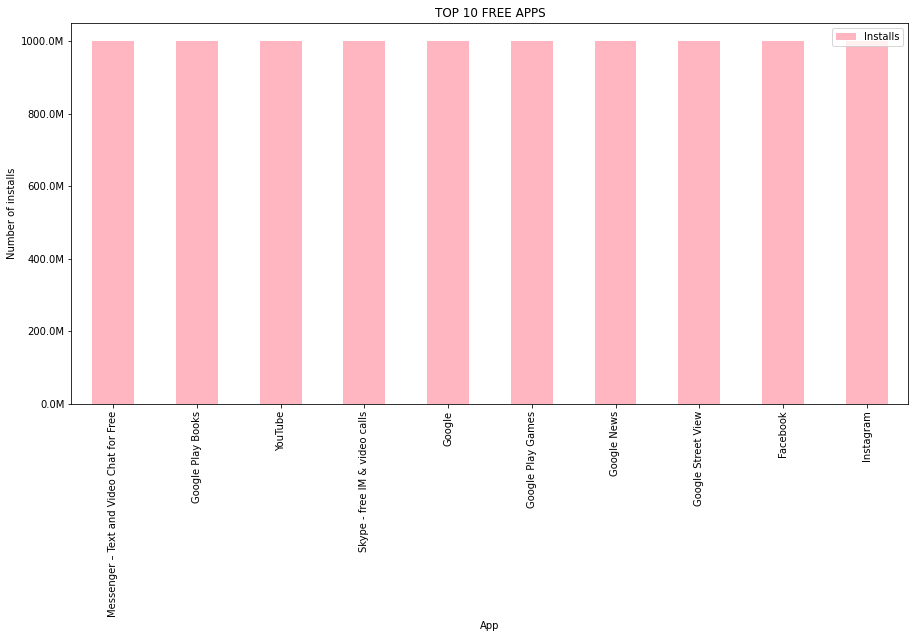

In [ ]:
# Plotting graph
ax=top_10_free_apps.plot(x='App',y='Installs',kind='bar',color='lightpink',figsize=(15,7),title='TOP 10 FREE APPS')
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)
formatter = FuncFormatter(millions)
#setting x and y labels
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('App')
ax.set_ylabel('Number of installs')

**LETS SEE TOP 10 APPS WITH MOST INSTALLS**

In [ ]:
# Creating data frame sorting values and resetting index of data frame
df5=pd.DataFrame(play_store_df.sort_values('Installs',ascending=False)[['App','Installs']]).reset_index(drop=True).loc[:9,['App','Installs']]
df5

,App,Installs
0,WhatsApp Messenger,1000000000
1,Google Play Books,1000000000
2,Subway Surfers,1000000000
3,Maps - Navigate & Explore,1000000000
4,Gmail,1000000000
5,Instagram,1000000000
6,Facebook,1000000000
7,Google Chrome: Fast & Secure,1000000000
8,Google+,1000000000
9,YouTube,1000000000


Text(0, 0.5, 'Number of installs')

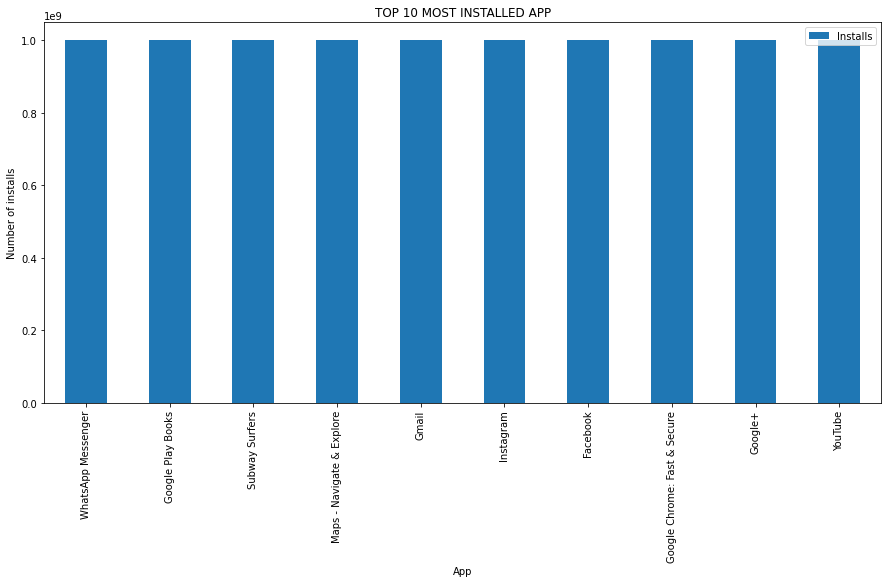

In [ ]:
# Plotting graph
ax=df5.plot(x='App',y='Installs',kind='bar',figsize=(15,7),title='TOP 10 MOST INSTALLED APP')
#setting x and y labels
ax.set_xlabel('App')
ax.set_ylabel('Number of installs')

**Now, we merged both the dataframes**

In [ ]:
# Joins the both Dataframes using the inner join method
merged_df = pd.merge(play_store_df, user_review_df, on='App', how = "inner")

In [ ]:
# Remove the null values from the columns category and sentiments
merged_df=merged_df.dropna(subset=['Sentiment', 'Category','Translated_Review'])

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 61555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   Category                35929 non-null  object 
 2   Rating                  35929 non-null  float64
 3   Reviews                 35929 non-null  object 
 4   Size                    35929 non-null  object 
 5   Installs                35929 non-null  int64  
 6   Type                    35929 non-null  object 
 7   Price                   35929 non-null  object 
 8   Content Rating          35929 non-null  object 
 9   Genres                  35929 non-null  object 
 10  Last Updated            35929 non-null  object 
 11  Current Ver             35929 non-null  object 
 12  Android Ver             35929 non-null  object 
 13  Translated_Review       35929 non-null  object 
 14  Sentiment               35929 non-null


<B>Sentiment analysis of user reviews 


Here, we plot the histogram for sentimemts.


*   From this data, we can analyze how much people like or dislike the app.
*   Many people are there whose reviews are neutral, which means these people neither like nor dislike the app. They use such kinds of apps to fulfill their purpose but they are not interested in these apps.

In [ ]:
Sentiment_df=merged_df['Sentiment'].value_counts().sort_values(ascending=False)

In [ ]:
Sentiment_df

Positive    23073
Negative     8005
Neutral      4851
Name: Sentiment, dtype: int64

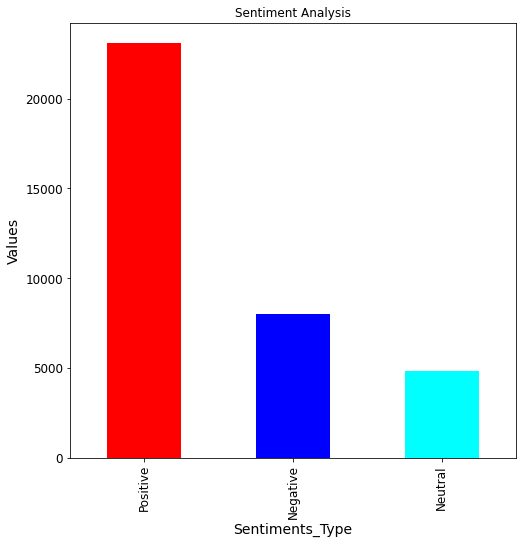

In [ ]:
#Plot the histogram for above dataframe
# Creating a figure object
ax = Sentiment_df.plot(kind='bar', title ='Sentiment Analysis', figsize=(8, 8),
                       color=[ 'red', 'blue', 'cyan'], fontsize=12)
ax.set_xlabel("Sentiments_Type", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
plt.show()

**OBSERVATION:**  From the above histogram, we can see that **23073** peoples share the positive reviews and **8005** people share the negative reviews of the apps. And 5158 peoples share neutral reviews. And, **4851** peoples share neutral reviews for the apps. 

In [ ]:
merged_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<B>Sentiment analysis of application category.

Analysis of the histogram for sentiments.


*   From this data, we can analyze that which category has highly positve reviews. 
*   Which category dominates in terms of reviews.

*   Which category falls behind in terms of review.
*   For which category people gives maximun neutral review.



In [ ]:
sentiment_df=merged_df.groupby(['Sentiment','Category']).agg({'Sentiment':'count'}).rename(columns={'Sentiment':'Counts'}).reset_index(0)

Text(0, 0.5, 'Counts')

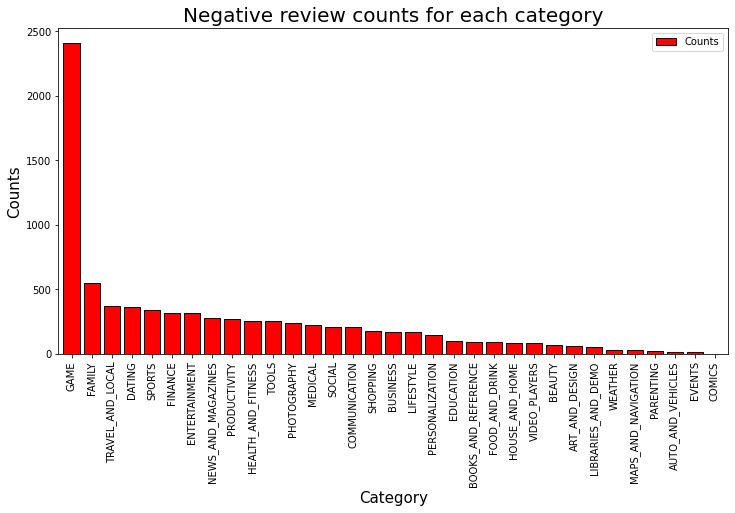

In [ ]:
#Plot the histogram for above dataframe
# Creating a figure object
ax=(sentiment_df.iloc[0:33,].sort_values('Counts',ascending=False).plot.
   bar(width=0.8,linewidth=1, color=['red'] ,edgecolor='black',figsize = (12,6),fontsize = 10))
ax.set_title("Negative review counts for each category", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Category", fontsize = 15)
ax.set_ylabel("Counts", fontsize = 15)

Text(0, 0.5, 'Counts')

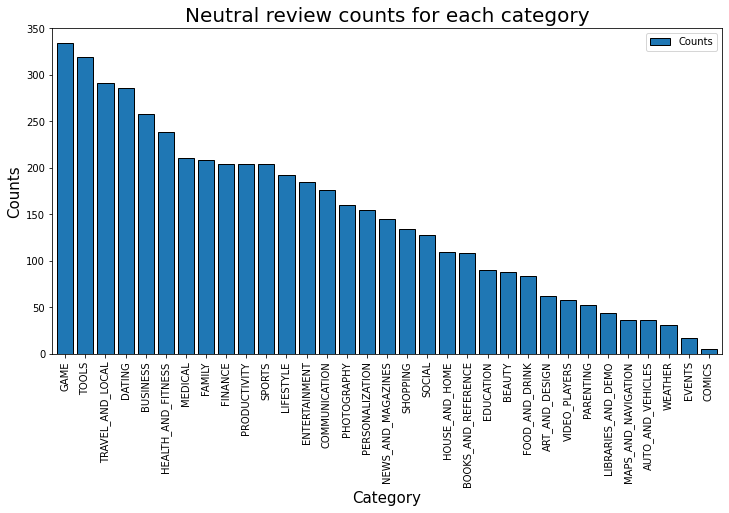

In [ ]:
# Neutral review counts for each category
# Creating a figure object
ax=(sentiment_df.iloc[33:66,].sort_values('Counts',ascending=False).plot.
    bar(width=0.8,linewidth=1, edgecolor='black',
    figsize = (12,6),
    fontsize = 10))
ax.set_title("Neutral review counts for each category", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Category", fontsize = 15)
ax.set_ylabel("Counts", fontsize = 15)

Text(0, 0.5, 'Counts')

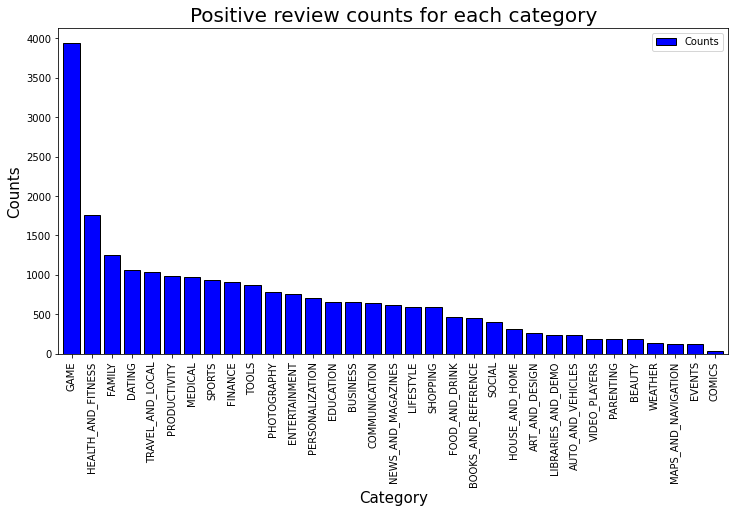

In [ ]:
# Positive review counts for each category
# Creating a figure object
ax=(sentiment_df.iloc[66:100,].sort_values('Counts',ascending=False).plot.
    bar(width=0.8,linewidth=1, edgecolor='black',
    color=['blue'],
    figsize = (12,6),
    fontsize = 10))
ax.set_title("Positive review counts for each category", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Category", fontsize = 15)
ax.set_ylabel("Counts", fontsize = 15)

**OBSERVATION:** From the above, histograms we can conclude that the game catrgory revives the highest number of postive and negative review. It means some games application are very popular so **Games** category dominates in terms of positive review.
Some games applications are very less popular thats why games category also recives highest number of negative reviews.
It means the games category contains the highest number of successful applications.
Most people are fond of game applications.

*   It means the games category contains the highest number of successful applications
*   Most people are fond of game applications.

*   Comics category revises very less amount of reviews. It falls at last in terms of review. But, there is no negaitve reviews for comics.






<B>Print the 3 apps that have the highest number of positive and negative reviews.


In [ ]:
merged_df_new=merged_df[['App','Sentiment']].value_counts().reset_index().rename(columns={0:'Counts'})

In [ ]:
merged_df_new

,App,Sentiment,Counts
0,Helix Jump,Positive,209
1,Duolingo: Learn Languages Free,Positive,200
2,Calorie Counter - Macros,Positive,174
3,Bowmasters,Positive,169
4,Calorie Counter - MyFitnessPal,Positive,169
...,...,...,...
2235,Backgrounds (HD Wallpapers),Neutral,1
2236,Flashlight HD LED,Neutral,1
2237,BaconReader for Reddit,Neutral,1
2238,Flashlight HD LED,Negative,1


In [ ]:
# Top 3 apps having highest number of positive reviews
print(f"The application {merged_df_new.loc[0,'App']} has {merged_df_new.loc[0,'Counts']} positive reviews ")
print(f"The application {merged_df_new.loc[1,'App']} has {merged_df_new.loc[1,'Counts']} positive reviews ")
print(f"The application {merged_df_new.loc[2,'App']} has {merged_df_new.loc[2,'Counts']} positive reviews ")

The application Helix Jump has 209 positive reviews 
The application Duolingo: Learn Languages Free has 200 positive reviews 
The application Calorie Counter - Macros has 174 positive reviews 


In [ ]:
# Top 3 apps having highest number of negative reviews
print(f"The application {merged_df_new.loc[4,'App']} has {merged_df_new.loc[4,'Counts']} negative reviews ")
print(f"The application {merged_df_new.loc[6,'App']} has {merged_df_new.loc[6,'Counts']} negative reviews ")
print(f"The application {merged_df_new.loc[7,'App']} has {merged_df_new.loc[7,'Counts']} negative reviews ")

The application Calorie Counter - MyFitnessPal has 169 negative reviews 
The application Angry Birds Classic has 147 negative reviews 
The application Google Photos has 143 negative reviews 


**Sentiment Analysis for paid and free applications**

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

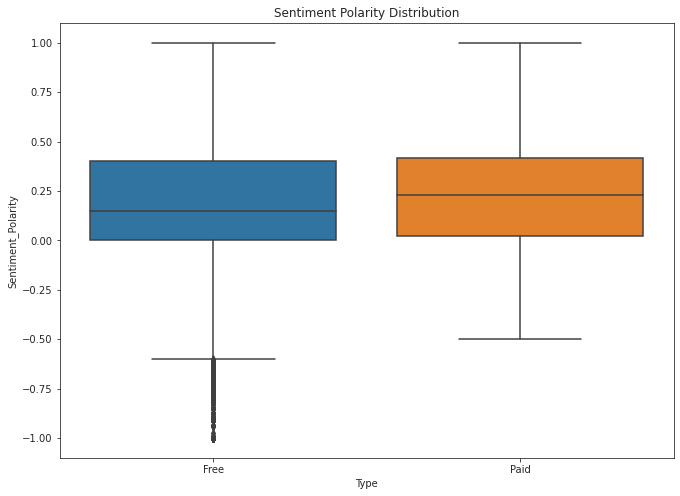

In [ ]:
# Prepare Box Plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

**OBSERVATION:** In the above boxplot, we plot the sentiment polarity scores of user reviews for paid and free apps. From the Boxplot, we can analyze that the free app receives many harsh comments of very high negativity, which can be analyzed by the outliers on the negative y-axis. The paid apps also receive harsh comments but they are not extreme negative as free apps. This may demonstrate something about application quality, i.e., paid applications being more excellent than free applications all things considered. In this project, we broke down more than 10,000 applications from the Google Play Store. We can utilize our discoveries to educate our choices.

# **What we observe in the above process**


*  There is a total of 1832 apps that are from the family category which is the most and after that game category is at second with 959 apps.
*   Here we can see 897 apps are having a 4.4 rating which is the most and after that, in the second place 895 apps are having a 4.3 rating, most apps are having 4.3 ratings. Most of the apps having ratings between 3.5 to 4.8.


*   Here we can see the family category is having the most ratings which are 1608 and second there is the game category with 912 ratings.
*   Here we can see the game category is having the most number of installs and after that communication category is having the second most number of installs.

*   Out of 9659 apps 6284 receive updates in the year 2018.
*   List item

*   Here we can see that the 7903 app belongs to the content rating everyone and 1036 is for teens. For Mature 17+  there are 393 apps. Only 3 apps fall under the 18+ category.
*   Here, we can see the apps with 1000000000+ installs.


*   Mostly the size of free app lying between 2.3M to 33M. There are 171 app of size 13M. 

*   The size of paid apps lying between 1.2M to 33M.



*   Here we can see there is a total of 8902 apps that are free and 756 apps are paid.
*   Here we can see a total of 75065572646 free apps are installed and a total of 57364881 paid apps are installed.

*   Here we can see the paid apps with the number of installs.
*   We observe that 23073 peoples share the positive reviews and 8005 people share the negative reviews of the apps. And 5158 peoples share neutral reviews. And, 4851 peoples share neutral reviews for the apps.

*   **Games** category dominates in terms of positive review.
*   Comics category revises very less amount of reviews. It falls at last in terms of review. But, there is no negaitve reviews for comics.


*   The application Helix Jump has 209 positive reviews. 
*   The application Calorie Counter - MyFitnessPal has 169 negative reviews.

*   From the Boxplot, we can analyze that the free app receives many harsh comments of very high negativity, which can be analyzed by the outliers on the negative y-axis. The paid apps also receive harsh comments but they are not extreme negative as free apps.

*   This may demonstrate something about application quality, i.e., paid applications being more excellent than free applications all things considered.






















# **Explore and analyze the data to discover key factors responsible for app engagement and success.**



> The major key factor responsible for engagement and success is the size of the app, category, content rating, type, reviews, last update, and rating. As we observe in the above graphs, the family and games category dominates the app counts. Most of the apps belong to these two categories. Similarly, the maximum app rating lying between 3.4 to 4.8. Also, the apps that are of type free are more popular than paid apps. Updates play an important role in the success of an app because the update provides the latest features and removes the bugs. Those apps whose sizes are less can be used on all devices. How many people installed the app is also a major factor because if more people install the app then it means more people give ratings and reviews for the apps. Games category app receives the highest positive reviews. But, the quality of paid apps is better than free. For example, the app Helix Jump receives the highest positive review having a rating of 4.2 and of type free and it is installed on more than 100000000 devices.

> Some factor varies from person to person such as those people who want quality in apps they opt for paid apps. 
In my opinion, the size of the app should be less and if the app is paid then the price of the app is economical. It would be better if the app is free. The app is available for all age groups. Nowadays people mostly used games and social apps.













The biggest challenge is to find the datast is redundent or not. The size of data set is large so it takes lots of time to understand the data is redunden or not.

The sentiment polarity and sentiment subjective cause trobules for us. It is not easy how to use that data and which plot is suitable for that type of data.

The number of installs in the data is 10,000,000+, most of the apps has the same number. It is quite confusing for us to take which app or not.

In case of size, more than 1000 apps size varies with devices because of that we cannot consider these apps in some cases to refine our results.